## Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Tabelas de Constantes

In [2]:
c_alpha_ks = {0.20: 1.07, 0.15: 1.14,
          0.10: 1.22, 0.05: 1.36,
          0.01: 1.63
         }

In [129]:
valores_criticos_sw = {
    3:  {0.01: 0.753, 0.05: 0.767, 0.10: 0.789},
    4:  {0.01: 0.687, 0.05: 0.748, 0.10: 0.792},
    5:  {0.01: 0.686, 0.05: 0.762, 0.10: 0.806},
    6:  {0.01: 0.713, 0.05: 0.788, 0.10: 0.826},
    7:  {0.01: 0.730, 0.05: 0.803, 0.10: 0.838},
    8:  {0.01: 0.749, 0.05: 0.818, 0.10: 0.851},
    9:  {0.01: 0.764, 0.05: 0.829, 0.10: 0.859},
    10: {0.01: 0.781, 0.05: 0.842, 0.10: 0.869},
    11: {0.01: 0.792, 0.05: 0.850, 0.10: 0.876},
    12: {0.01: 0.805, 0.05: 0.859, 0.10: 0.883},
    13: {0.01: 0.814, 0.05: 0.866, 0.10: 0.889},
    14: {0.01: 0.825, 0.05: 0.874, 0.10: 0.895},
    15: {0.01: 0.835, 0.05: 0.881, 0.10: 0.901},
    16: {0.01: 0.844, 0.05: 0.887, 0.10: 0.906},
    17: {0.01: 0.851, 0.05: 0.892, 0.10: 0.910},
    18: {0.01: 0.858, 0.05: 0.897, 0.10: 0.914},
    19: {0.01: 0.863, 0.05: 0.901, 0.10: 0.917},
    20: {0.01: 0.868, 0.05: 0.905, 0.10: 0.920},
    21: {0.01: 0.873, 0.05: 0.908, 0.10: 0.823},
    22: {0.01: 0.878, 0.05: 0.911, 0.10: 0.926},
    23: {0.01: 0.881, 0.05: 0.914, 0.10: 0.928},
    24: {0.01: 0.884, 0.05: 0.916, 0.10: 0.930},
    25: {0.01: 0.888, 0.05: 0.918, 0.10: 0.931},
    26: {0.01: 0.891, 0.05: 0.920, 0.10: 0.933},
    27: {0.01: 0.894, 0.05: 0.923, 0.10: 0.935},
    28: {0.01: 0.896, 0.05: 0.924, 0.10: 0.936},
    29: {0.01: 0.898, 0.05: 0.926, 0.10: 0.937}, 
    30: {0.01: 0.900, 0.05: 0.927, 0.10: 0.939}
}

In [130]:
coef_ain_sw = {2: [0.7071], 3: [0.7071, 0.0000], 4: [0.6872, 0.1677], 5: [0.6646, 0.2143, 0.0000], 6: [0.6431, 0.2806, 0.0875],
               7: [0.6233, 0.3031, 0.1401, 0.0000], 8: [0.6052, 0.3164, 0.1743, 0.0561], 9: [0.5888, 0.3244, 0.1976, 0.0947, 0.0000], 10: [0.5739, 0.3291, 0.2141, 0.1224, 0.0399], 11: [0.5061, 0.3315, 0.2260, 0.1429, 0.0695, 0.0000],
               12: [0.5475, 0.3325, 0.2347, 0.1586, 0.0922, 0.0303], 13: [0.5359, 0.3325, 0.2412, 0.1707, 0.1099, 0.0539, 0.0000], 14: [0.5251, 0.3318, 0.2460, 0.1802, 0.1240, 0.0727, 0.0240], 15: [0.5150, 0.3306, 0.2495, 0.1878, 0.1353, 0.0880, 0.0433, 0.0000], 16: [0.5056, 0.3290, 0.2521, 0.1939, 0.1447, 0.1005, 0.0593, 0.0196],
               17: [0.4968, 0.3273, 0.2540, 0.1988, 0.1524, 0.1109, 0.0725, 0.0359, 0.0000] , 18: [0.4886, 0.3253, 0.2553, 0.2027, 0.1587, 0.1197, 0.0837, 0.0496, 0.0163], 19: [0.4808, 0.3232, 0.2561, 0.2059, 0.1641, 0.1271, 0.0932, 0.0612, 0.0303, 0.0000], 20: [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140], 
               21: [0.4643, 0.3185, 0.2578, 0.2119, 0.1736, 0.1399, 0.1092, 0.0804, 0.0530, 0.0263, 0.0000], 22: [0.4590, 0.3156, 0.2571, 0.2131, 0.1764, 0.1443, 0.1150, 0.0878, 0.0618, 0.0368, 0.0122], 23: [0.4542, 0.3126, 0.2563, 0.2139, 0.1787, 0.1480, 0.1201, 0.0941, 0.0696, 0.0459, 0.0228, 0.0000], 24: [0.4493, 0.3098, 0.2554, 0.2145, 0.1807, 0.1512, 0.1245, 0.0997, 0.0764, 0.0539, 0.0321, 0.0107], 
               25: [0.4450, 0.3069, 0.2543, 0.2148, 0.1822, 0.1539, 0.1283, 0.1046, 0.0823, 0.0610, 0.0403, 0.0200, 0.0000], 26: [0.4407, 0.3043, 0.2533, 0.2151, 0.1836, 0.1563, 0.1316, 0.1089, 0.0876, 0.0672, 0.0476, 0.0284, 0.0094], 27: [0.4366, 0.3018, 0.2522, 0.2152, 0.1848, 0.1584, 0.1346, 0.1128, 0.0923, 0.0728, 0.0540, 0.0358, 0.0178, 0.0000], 28: [0.4328, 0.2992, 0.2510, 0.2151, 0.1857, 0.1601, 0.1372, 0.1162, 0.0965, 0.0778, 0.0598, 0.0424, 0.0253, 0.0084],
               29: [0.4291, 0.2968, 0.2499, 0.2150, 0.1864, 0.1616, 0.1395, 0.1192, 0.1002, 0.0822, 0.0650, 0.0483, 0.0320, 0.0159, 0.0000], 30: [0.4254, 0.2944, 0.2487, 0.2148, 0.1870, 0.1630, 0.1415, 0.1219, 0.1036, 0.0862, 0.0697, 0.0537, 0.0381, 0.0227, 0.0076]
}

### Criação de Amostras

In [549]:
def gerar_amostra_normal(tam, mu=0, sigma=1):
    return np.random.normal(mu, sigma, tam)

def gerar_amostras_nao_normais(tam):
    tipos = ['exponencial', 'uniforme', 'gama', 'lognormal', 'beta']
    escolha = random.choice(tipos)

    if(escolha == 'uniforme'):
        a = 0
        b = 100
        valor = np.random.uniform(a, b, tam)
        return escolha, valor

    elif(escolha == 'exponencial'):
        lamb = 1
        valor = np.random.exponential(lamb, tam)
        return escolha, valor

    elif(escolha == 'gama'):
        alpha = 2
        beta = 2
        valor = np.random.gamma(alpha, beta, tam)
        return escolha, valor

    elif(escolha == 'lognormal'):
        mu = 0
        sigma = 1
        valor = np.random.lognormal(mu, sigma, tam)
        return escolha, valor
        
    elif(escolha == 'beta'):
        a = 2
        b = 5
        valor = np.random.beta(a, b, tam)
        return escolha, valor

In [373]:
def criar_amostras(tamanho):
    amostras = []
    qt_normais = 250
    qt_nao_normais = 250

    # Criação das amostras normais
    for i in range(qt_normais):
        valor = gerar_amostra_normal(tamanho)
        amostras.append({'id_amostra': f"Normal_{i+1}",
                       'tipo': 'normal',
                        'valores': valor
                       })

    #Criaçao das Amostras nao normais
    for j in range(qt_nao_normais):
        tipo, valores = gerar_amostras_nao_normais(tamanho)
        amostras.append({
            'id_amostra': f"Nao_Normal_{j+1}",
            'tipo': tipo,
            'valores': valores
        })

    return pd.DataFrame(amostras)

## Testes de Normalidade Univariada

### Kolmogorov-Smirnov

In [267]:
def kolmogorov_smirnov_manual(data):
    valores = sorted(data) #Ordena os valores
    n = len(valores) #tamanho da amostra
    
    #Contagem de valores repetidos
    x = {}
    for v in valores:
        x[v] = x.get(v, 0) + 1

    
    xi = [] #Xi - valores
    fabs = [] #Quantas vezes aparece o valor xi
    fac = [] #Frequencia relativa acumulada
    y = 0
    for i, j in x.items():
        xi.append(i)
        fabs.append(j)
        
        y += j
        fac.append(y)

    fobs = [] #Frequencia observada no ponto xi
    for i in fac:
        fobs.append(i/n)
    fobs = np.round(fobs, 5) #arrendondando para 5 casas decimais

    media = np.mean(valores)
    dp = np.std(valores, ddof=1)
        
    zi = [] #normalizacao do ponto xi
    for i in xi:
        zv = ((i-media)/dp)
        zi.append(zv)

    zi = np.round(zi, 2) #duas casas decimais
    fesp = stats.norm.cdf(zi, loc=0, scale=1)
    fesp = np.round(fesp, 5) #cinco casas decimais

    d1 = np.abs(fesp-fobs) #|FespX(i) - FobsX(i)| para todo xi
    fobs_ant = np.concatenate(([0.0], fobs[:-1]))
    d2 = np.abs(fesp-fobs_ant) #FespX(i) - FobsX(i-1)|
    dcalc = max(np.max(d1), np.max(d2)) #dcalc

    return dcalc, {
        'xi': xi,
        'fabs': fabs,
        'fac': fac,
        'fobs': fobs,
        'zi': zi,
        'fesp': fesp,
        '|fesp_xi - fobs_xi|': d1,
        '|fesp_xi - fobs_xi-1|': d2
        }

#Calculo do Dcritico
def val_critico(alpha, n):
    return (c_alpha_ks[alpha])/np.sqrt(n)

#Decisao sobre H0
def decisao_ks_manual(d_calc, d_crit):
    return d_calc > d_crit

In [268]:
def ks_scipy(amostra):
    media = np.mean(amostra)
    dp = np.std(amostra, ddof=1)
    n = len(amostra)

    val_est, p_value = stats.kstest(amostra, 'norm', args=(media, dp), N=n)
    return val_est, p_value

def decisao_ks_scipy(alpha, p_value):
    return p_value <= alpha

In [269]:
def comparacao_ks(amostras, alpha):
    resultado = []

    for _, row in amostras.iterrows():
        d_calc_manual, _ = kolmogorov_smirnov_manual(row['valores'])
        d_calc_scipy, p_value = ks_scipy(row['valores'])

        d_critico = val_critico(alpha, len(row['valores']))

        resultado.append({
            'id_amostra': row['id_amostra'],
            'tipo': row['tipo'],
            'd_calc_manual': d_calc_manual,
            'd_cacl_scipy': d_calc_scipy,
            'p_value': p_value,
            'rejeita_h0_manual': decisao_ks_manual(d_calc_manual, d_critico),
            'rejeita_h0_scipy': decisao_ks_scipy(alpha, p_value)
            })

    return pd.DataFrame(resultado)

### Exemplo do Material

In [270]:
amostra = [52, 50, 36, 40, 30, 42, 38, 38,
           52, 44, 36, 34, 50, 42, 34, 55,
           36, 55, 42, 52, 34, 48, 55, 44,
           44, 30, 48, 40, 40, 44, 40, 44,
           38, 36, 50, 42]
alpha = 0.05

In [271]:
d_calc, result = kolmogorov_smirnov_manual(amostra)
df = pd.DataFrame(result)
df

,xi,fabs,fac,fobs,zi,fesp,|fesp_xi - fobs_xi|,|fesp_xi - fobs_xi-1|
0,30,2,2,0.05556,-1.78,0.03754,0.01802,0.03754
1,34,3,5,0.13889,-1.22,0.11123,0.02766,0.05567
2,36,4,9,0.25000,-0.94,0.17361,0.07639,0.03472
3,38,3,12,0.33333,-0.65,0.25785,0.07548,0.00785
4,40,4,16,0.44444,-0.37,0.35569,0.08875,0.02236
5,42,4,20,0.55556,-0.09,0.46414,0.09142,0.01970
6,44,5,25,0.69444,0.19,0.57535,0.11909,0.01979
7,48,2,27,0.75000,0.76,0.77637,0.02637,0.08193
8,50,3,30,0.83333,1.04,0.85083,0.01750,0.10083
9,52,3,33,0.91667,1.32,0.90658,0.01009,0.07325


In [272]:
d_critico = val_critico(alpha, len(amostra))
print(d_critico)

0.22666666666666668


In [273]:
est_scipy, p_valor = ks_scipy(amostra)

print("--------------- Dcalc -------------------")
print(f"Dcalc: Manual = {d_calc}, Scipy = {est_scipy:.5f}")
print("\t")

manual = decisao_ks_manual(d_calc, d_critico)
scip = decisao_ks_scipy(alfa, p_valor)

print("-------------- Decisão ---------------------")
print(f"Rejeitamos H0? Manual = {manual}, Scipy = {scip}")

--------------- Dcalc -------------------
Dcalc: Manual = 0.11908999999999992, Scipy = 0.11843
	
-------------- Decisão ---------------------
Rejeitamos H0? Manual = False, Scipy = False


### Exemplos com amostras aleatórias

#### Amostras Aleatórias com 50 de tamanho

In [550]:
tam = 50
amostras_aleatorias = criar_amostras(tam)
alfa = 0.05

In [551]:
amostras_tam50 = comparacao_ks(amostras_aleatorias, alfa)
amostras_tam50

,id_amostra,tipo,d_calc_manual,d_cacl_scipy,p_value,rejeita_h0_manual,rejeita_h0_scipy
0,Normal_1,normal,0.06857,0.068660,0.959597,False,False
1,Normal_2,normal,0.07644,0.076216,0.912145,False,False
2,Normal_3,normal,0.12706,0.128656,0.349279,False,False
3,Normal_4,normal,0.08776,0.088555,0.795256,False,False
4,Normal_5,normal,0.08100,0.081458,0.867579,False,False
...,...,...,...,...,...,...,...
495,Nao_Normal_246,exponencial,0.19791,0.199685,0.031850,True,True
496,Nao_Normal_247,exponencial,0.12924,0.128742,0.348495,False,False
497,Nao_Normal_248,uniforme,0.11327,0.112729,0.512731,False,False
498,Nao_Normal_249,exponencial,0.22803,0.226046,0.009996,True,True


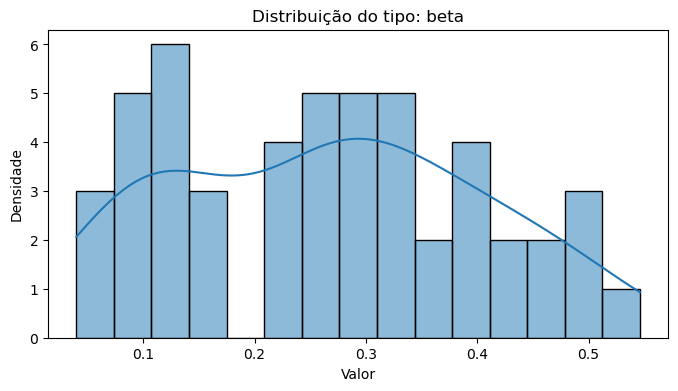

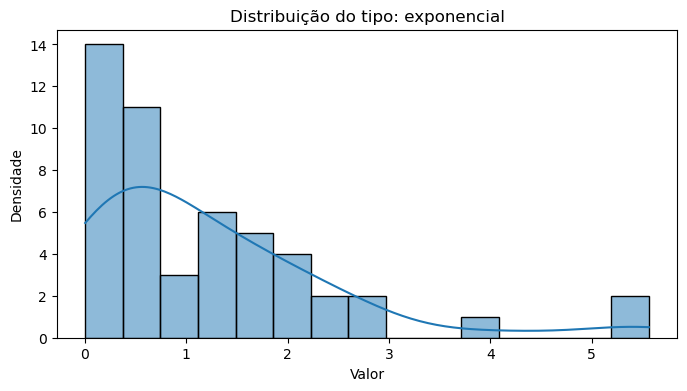

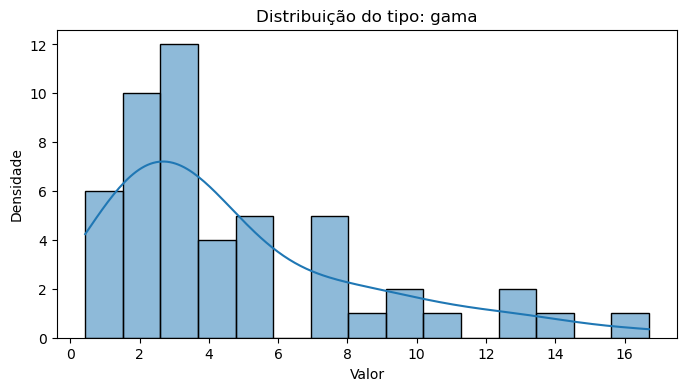

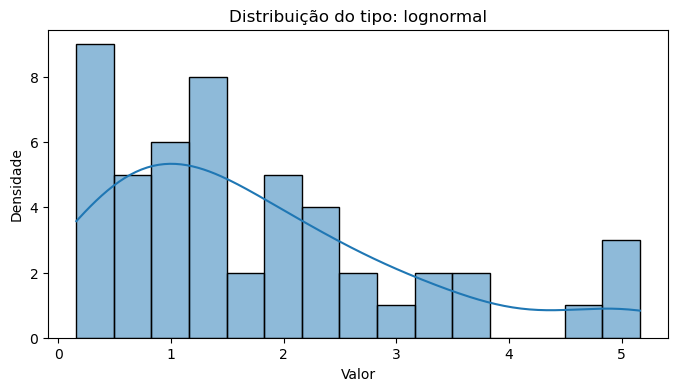

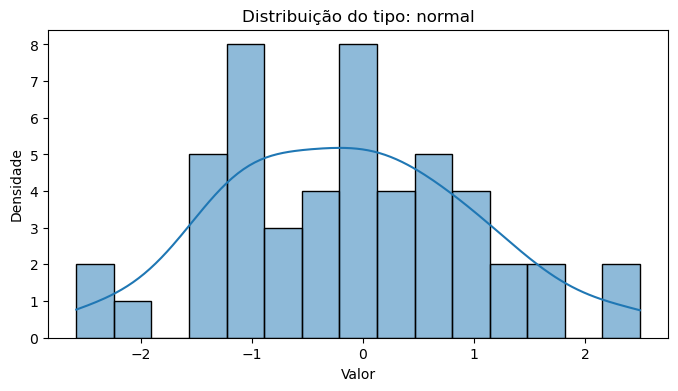

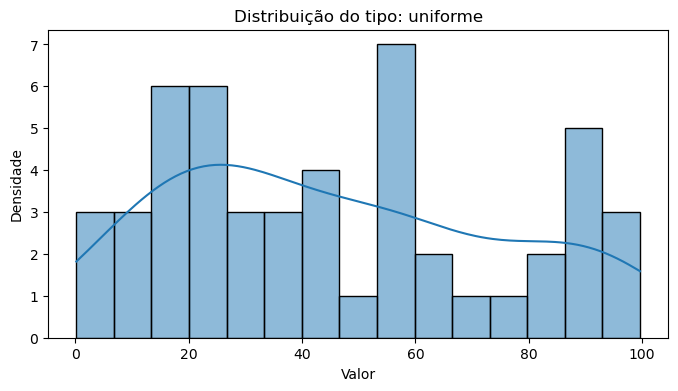

In [576]:
# Pegar uma amostra por tipo
graf = amostras_aleatorias.groupby('tipo').first().reset_index()

# Plotar cada distribuição como uma curva normal
for idx, row in graf.iterrows():
    plt.figure(figsize=(8, 4))
    sns.histplot(row['valores'], bins=15, kde=True)
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.title(f'Distribuição do tipo: {row["tipo"]}')
    plt.grid(False)
    plt.show()

In [552]:
amostras_tam50['tipo'].value_counts()

tipo
normal         250
exponencial     58
lognormal       51
uniforme        49
gama            47
beta            45
Name: count, dtype: int64

In [553]:
amostras_tam50.groupby(['tipo', 'rejeita_h0_manual']).size()

tipo         rejeita_h0_manual
beta         False                 44
             True                   1
exponencial  False                 38
             True                  20
gama         False                 46
             True                   1
lognormal    False                 11
             True                  40
normal       False                250
uniforme     False                 49
dtype: int64

In [554]:
amostras_tam50.groupby(['tipo', 'rejeita_h0_scipy']).size()

tipo         rejeita_h0_scipy
beta         False                44
             True                  1
exponencial  False                36
             True                 22
gama         False                41
             True                  6
lognormal    False                 9
             True                 42
normal       False               250
uniforme     False                49
dtype: int64

#### Amostras aleatórias com 250 de tamanho

In [294]:
tamamocross = 250
amostras_250 = criar_amostras(tamamocross)

In [295]:
amostras_250_comp = comparacao_ks(amostras_250, alfa)
amostras_250_comp

,id_amostra,tipo,d_calc_manual,d_cacl_scipy,p_value,rejeita_h0_manual,rejeita_h0_scipy
0,Normal_1,normal,0.03916,0.038874,8.298542e-01,False,False
1,Normal_2,normal,0.03404,0.033362,9.347557e-01,False,False
2,Normal_3,normal,0.03025,0.029945,9.735401e-01,False,False
3,Normal_4,normal,0.03626,0.037768,8.544703e-01,False,False
4,Normal_5,normal,0.04703,0.046709,6.292145e-01,False,False
...,...,...,...,...,...,...,...
495,Nao_Normal_246,beta,0.06058,0.059449,3.270057e-01,False,False
496,Nao_Normal_247,lognormal,0.22065,0.219909,4.255427e-11,True,True
497,Nao_Normal_248,beta,0.08317,0.083221,5.915608e-02,False,False
498,Nao_Normal_249,exponencial,0.16354,0.164231,2.322173e-06,True,True


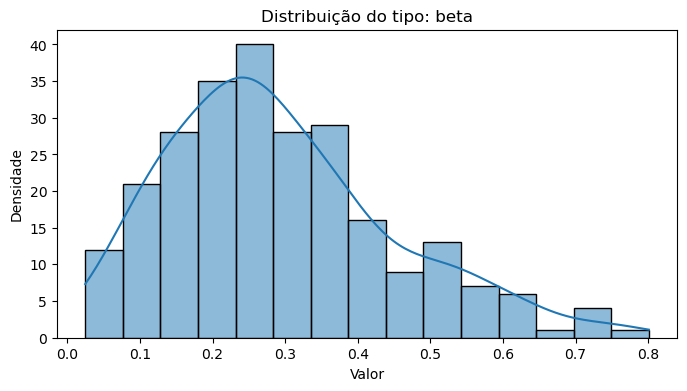

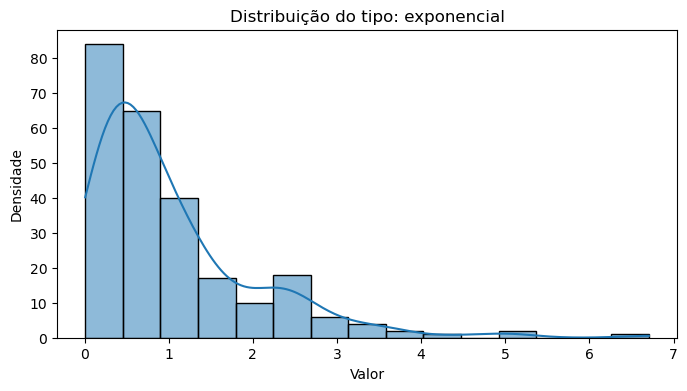

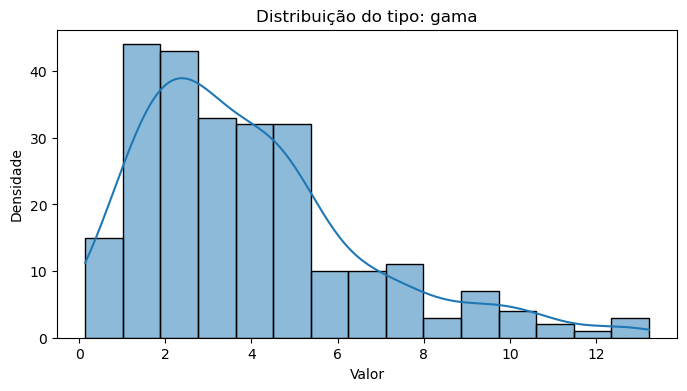

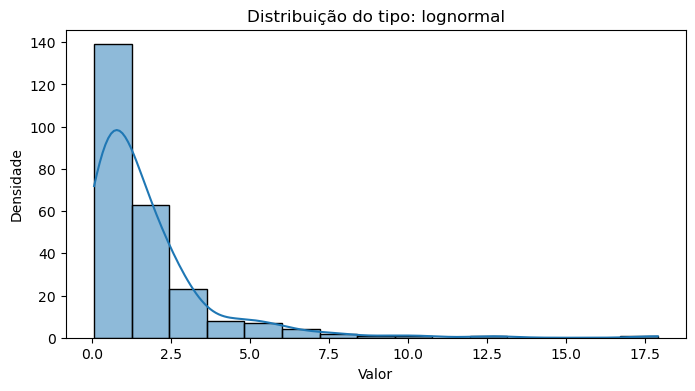

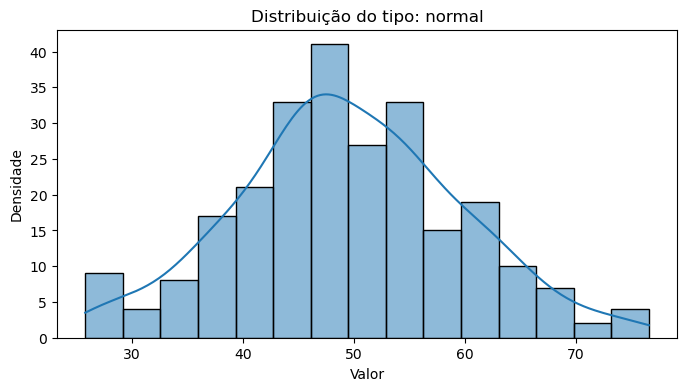

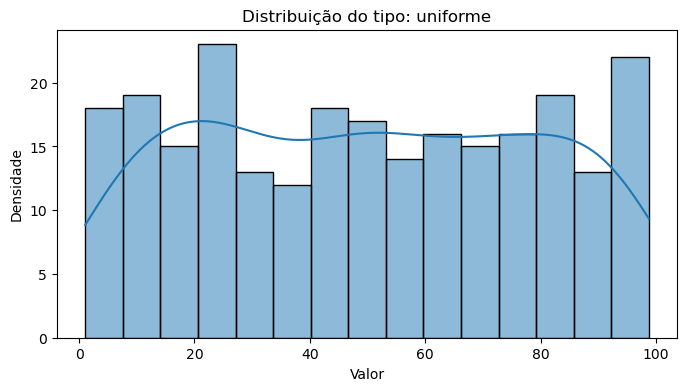

In [578]:
# Pegar uma amostra por tipo
graf250 = amostras_250.groupby('tipo').first().reset_index()

# Plotar cada distribuição como uma curva normal
for idx, row in graf250.iterrows():
    plt.figure(figsize=(8, 4))
    sns.histplot(row['valores'], bins=15, kde=True)
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.title(f'Distribuição do tipo: {row["tipo"]}')
    plt.grid(False)
    plt.show()

In [296]:
amostras_250_comp['tipo'].value_counts()

tipo
normal         250
lognormal       60
beta            51
exponencial     50
gama            50
uniforme        39
Name: count, dtype: int64

In [297]:
amostras_250_comp.groupby(['tipo', 'rejeita_h0_manual']).size()

tipo         rejeita_h0_manual
beta         False                 45
             True                   6
exponencial  True                  50
gama         False                  1
             True                  49
lognormal    True                  60
normal       False                250
uniforme     False                 28
             True                  11
dtype: int64

In [298]:
amostras_250_comp.groupby(['tipo', 'rejeita_h0_scipy']).size()

tipo         rejeita_h0_scipy
beta         False                43
             True                  8
exponencial  True                 50
gama         False                 1
             True                 49
lognormal    True                 60
normal       False               250
uniforme     False                28
             True                 11
dtype: int64

#### Amostras aleatorias com 1000 de tamanho

In [299]:
marvelous = 1000
amostras_1000 = criar_amostras(marvelous)

In [300]:
amostras_1000_comp = comparacao_ks(amostras_1000, alfa)
amostras_1000_comp

,id_amostra,tipo,d_calc_manual,d_cacl_scipy,p_value,rejeita_h0_manual,rejeita_h0_scipy
0,Normal_1,normal,0.01665,0.016454,9.452888e-01,False,False
1,Normal_2,normal,0.01217,0.011939,9.985647e-01,False,False
2,Normal_3,normal,0.01928,0.017337,9.193508e-01,False,False
3,Normal_4,normal,0.02036,0.020044,8.088005e-01,False,False
4,Normal_5,normal,0.02776,0.026521,4.746771e-01,False,False
...,...,...,...,...,...,...,...
495,Nao_Normal_246,lognormal,0.29360,0.292722,2.086138e-76,True,True
496,Nao_Normal_247,lognormal,0.27125,0.272030,7.217623e-66,True,True
497,Nao_Normal_248,gama,0.10286,0.103031,1.073507e-09,True,True
498,Nao_Normal_249,gama,0.09662,0.096898,1.265311e-08,True,True


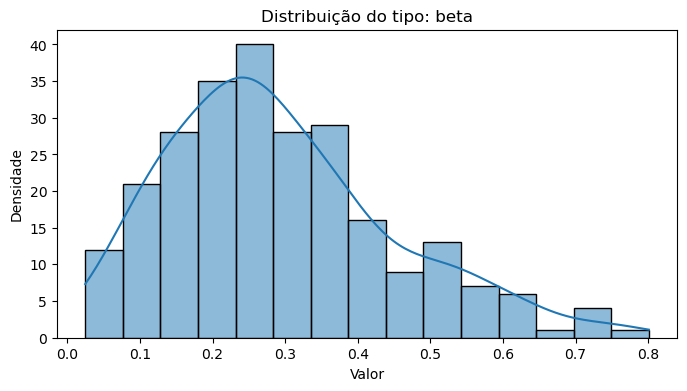

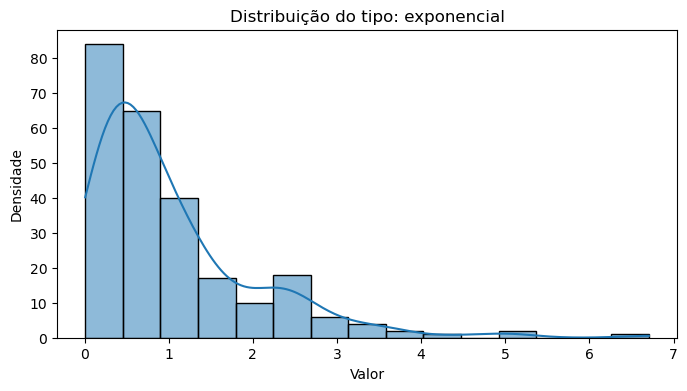

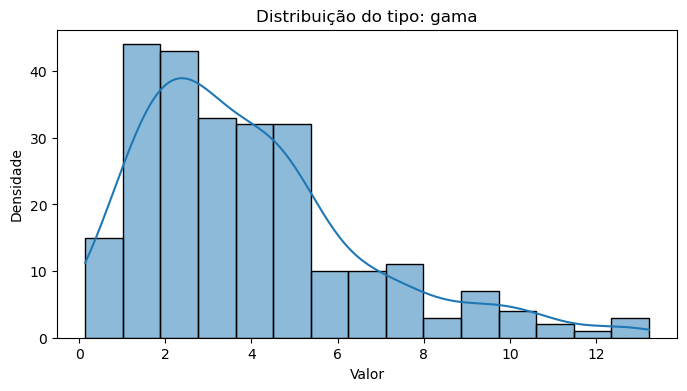

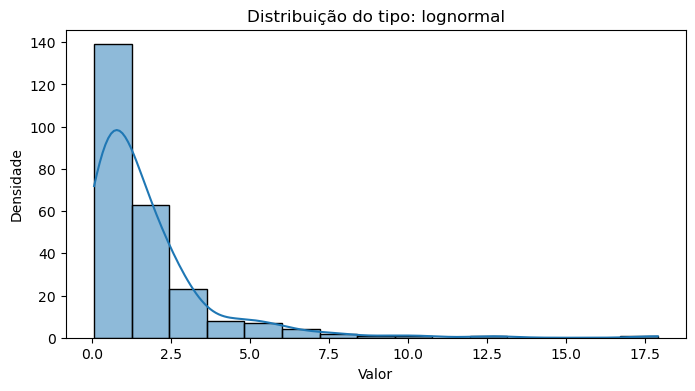

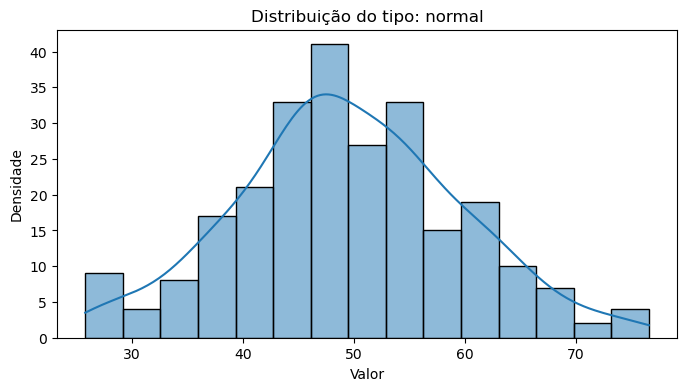

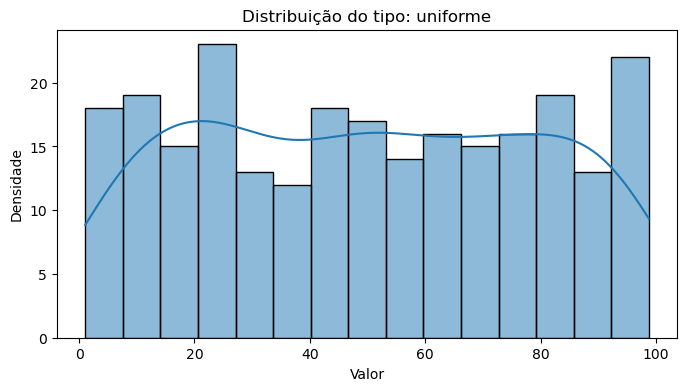

In [579]:
# Pegar uma amostra por tipo
graf1000 = amostras_1000.groupby('tipo').first().reset_index()

# Plotar cada distribuição como uma curva normal
for idx, row in graf250.iterrows():
    plt.figure(figsize=(8, 4))
    sns.histplot(row['valores'], bins=15, kde=True)
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.title(f'Distribuição do tipo: {row["tipo"]}')
    plt.grid(False)
    plt.show()

In [301]:
amostras_1000_comp['tipo'].value_counts()

tipo
normal         250
beta            57
exponencial     53
uniforme        52
gama            44
lognormal       44
Name: count, dtype: int64

In [302]:
amostras_1000_comp.groupby(['tipo', 'rejeita_h0_manual']).size()

tipo         rejeita_h0_manual
beta         True                  57
exponencial  True                  53
gama         True                  44
lognormal    True                  44
normal       False                250
uniforme     True                  52
dtype: int64

In [303]:
amostras_1000_comp.groupby(['tipo', 'rejeita_h0_scipy']).size()

tipo         rejeita_h0_scipy
beta         True                 57
exponencial  True                 53
gama         True                 44
lognormal    True                 44
normal       False               250
uniforme     True                 52
dtype: int64

### Comparação dos resultados finais

In [585]:
def calcular_taxa_acerto(amostras, metodo="rejeita_h0_manual"):
    resultados = []
    for tipo, grupo in amostras.groupby("tipo"):
        if tipo == "normal":
            esperado = False
        else:
            esperado = True

        acertos = (grupo[metodo] == esperado).sum()
        total = len(grupo)
        taxa = acertos / total
        resultados.append({"tipo": tipo, "taxa_acerto": taxa, "total": total})
    
    return pd.DataFrame(resultados)

In [587]:
final50 = calcular_taxa_acerto(amostras_tam50)
final250 = calcular_taxa_acerto(amostras_250_comp)
final1000 = calcular_taxa_acerto(amostras_1000_comp)

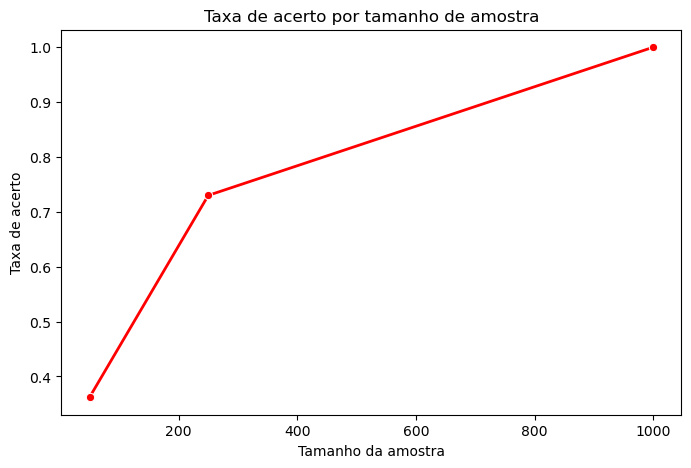

In [592]:
media50 = final50['taxa_acerto'].mean()
media250 = final250['taxa_acerto'].mean()
media1000 = final1000['taxa_acerto'].mean()

geral = pd.DataFrame({
    'tamanho_amostra': [50, 250, 1000],
    'taxa_acerto': [media50, media250, media1000]
})

plt.figure(figsize=(8, 5))
sns.lineplot(data=geral, x='tamanho_amostra', y='taxa_acerto', marker='o', linewidth=2, color='red')

plt.title("Taxa de acerto por tamanho de amostra")
plt.xlabel("Tamanho da amostra")
plt.ylabel("Taxa de acerto")
plt.grid(False)
plt.show()

### Shapiro-Wilk

In [312]:
def shapiro_wilk_manual(data):
    valores = sorted(data) #ordena
    n = len(valores) #tamanho da amostra

    i = []
    x_i = []
    if (n % 2 == 0): #verifica se o tam da amostra é par
        h = n//2
        for j in range(h):
            i.append(j+1)
            x_i.append(valores[j])

        nmim1 = list(reversed([k for k in range(h+1, n+1)]))
        x_nmim1 = list(reversed(valores[h:]))

    else:
        h = (n+1)//2
        for j in range(h):
            i.append(j+1)
            x_i.append(valores[j])

        nmim1 = list(reversed([k for k in range(h+1, n+1)]))
        nmim1.append(0)
        x_nmim1 = list(reversed(valores[h:]))
        x_nmim1.append(0)

    a_in = [] #Ai,n
    for j in i:
        a_in.append(coef_ain_sw[n][j-1])

    #Calculo de b
    calculo = []
    for k in range(h):
        calc = a_in[k]*(x_nmim1[k] - x_i[k])
        calculo.append(calc)

    media = np.mean(valores) #media estimada da amostra
    s = 0
    for k in range(n):
        s = s + ((valores[k] - media)**2)

    b = sum(calculo)
    w_calc = (b**2)/s

    return w_calc, {
        'i': i,
        'nmim1': nmim1,
        'a_in': a_in,
        'x_nmim1': x_nmim1,
        'x_i': x_i,
        'a_in(x_nmim1 - x_i)': calculo
    }

def valor_w_critico(alpha, n):
    return valores_criticos_sw[n][alpha]

def decisao_sw_manual(w_calculado, w_critico):
    return w_calculado < w_critico

In [403]:
def sw_scipy(data):
    wc_sc, p_sc = stats.shapiro(data)
    return wc_sc, p_sc

def decisao_sw_scipy(p_value, alpha):
    return p_value < alpha

In [404]:
def comparacao_sw(amostras, alpha):
    resultado = []

    for _, row in amostras.iterrows():
        w_calc_manual, _ = shapiro_wilk_manual(row['valores'])
        w_calc_scipy, p_value = sw_scipy(row['valores'])

        w_critico = valor_w_critico(alpha, len(row['valores']))

        resultado.append({
            'id_amostra': row['id_amostra'],
            'tipo': row['tipo'],
            'w_calc_manual': w_calc_manual,
            'w_calc_scipy': w_calc_scipy,
            'p_value': p_value,
            'rejeita_h0_manual': decisao_sw_manual(w_calc_manual, w_critico),
            'rejeita_h0_scipy': decisao_sw_scipy(p_value, alpha)
        })

    return pd.DataFrame(resultado)

### Exemplo do Material

In [405]:
valores = [15, 16, 18, 19, 20, 22, 23, 23,
          24, 24, 25, 28, 28, 29, 30, 30,
          31, 32, 32, 34, 36, 36, 39, 46, 55]

alfa = 0.01

In [406]:
wcalc, tstw = shapiro_wilk_manual(valores)
wcsc, psw = sw_scp(valores)

In [407]:
jojo = pd.DataFrame(tstw)
jojo

,i,nmim1,a_in,x_nmim1,x_i,a_in(x_nmim1 - x_i)
0,1,25,0.4450,55,15,17.8000
1,2,24,0.3069,46,16,9.2070
2,3,23,0.2543,39,18,5.3403
3,4,22,0.2148,36,19,3.6516
4,5,21,0.1822,36,20,2.9152
5,6,20,0.1539,34,22,1.8468
6,7,19,0.1283,32,23,1.1547
7,8,18,0.1046,32,23,0.9414
8,9,17,0.0823,31,24,0.5761
9,10,16,0.0610,30,24,0.3660


In [408]:
w_calc_scipy, p_valor = sw_scipy(valores)

In [409]:
print("-------------------Wcacl------------------")
print(f"Manual = {wcalc}, Scipy = {w_calc_scipy}")
print("\n")

wcritc = w_critico(alfa, len(valores))
manual = decisao_sw_manual(wcalc, wcritc)
scip = decisao_sw_scipy(p_valor, alfa)

print("-------------------Decisão-----------------")
print(f"Rejeita H0? Manual = {manual}, Scipy = {scip}")

-------------------Wcacl------------------
Manual = 0.9388629962984496, Scipy = 0.9394623462236583


-------------------Decisão-----------------
Rejeita H0? Manual = False, Scipy = False


### Exemplo com amostras aleatórias

In [435]:
urara = 30
amostras_sw = criar_amostras(urara)
alph = 0.01

In [436]:
amostras_sw

,id_amostra,tipo,valores
0,Normal_1,normal,"[33.30548998365793, 46.9321710631048, 44.25404..."
1,Normal_2,normal,"[44.443205514729286, 45.1354621441106, 60.6962..."
2,Normal_3,normal,"[52.11248607656324, 40.618468500203974, 32.320..."
3,Normal_4,normal,"[44.4105147814116, 54.45897257088457, 43.59896..."
4,Normal_5,normal,"[67.40253124690969, 46.131894462020455, 43.821..."
...,...,...,...
495,Nao_Normal_246,lognormal,"[1.0661314922439105, 2.494757718824255, 2.2015..."
496,Nao_Normal_247,exponencial,"[0.5352636894709527, 1.666014665948018, 1.2226..."
497,Nao_Normal_248,exponencial,"[0.09979927613397106, 0.6654890458744382, 1.00..."
498,Nao_Normal_249,gama,"[2.60668521330039, 3.3337711884813523, 0.43414..."


In [437]:
amostras_shapirow = comparacao_sw(amostras_sw, alph)
amostras_shapirow

,id_amostra,tipo,w_calc_manual,w_calc_scipy,p_value,rejeita_h0_manual,rejeita_h0_scipy
0,Normal_1,normal,0.961562,0.959605,0.302644,False,False
1,Normal_2,normal,0.915979,0.919636,0.026244,False,False
2,Normal_3,normal,0.974689,0.977126,0.745077,False,False
3,Normal_4,normal,0.951940,0.950567,0.175072,False,False
4,Normal_5,normal,0.944761,0.942620,0.107014,False,False
...,...,...,...,...,...,...,...
495,Nao_Normal_246,lognormal,0.741274,0.736745,0.000006,True,True
496,Nao_Normal_247,exponencial,0.792587,0.790754,0.000045,True,True
497,Nao_Normal_248,exponencial,0.908550,0.914243,0.019067,False,False
498,Nao_Normal_249,gama,0.970685,0.973739,0.645660,False,False


In [438]:
amostras_shapirow['tipo'].value_counts()

tipo
normal         250
gama            56
exponencial     55
lognormal       50
beta            49
uniforme        40
Name: count, dtype: int64

In [439]:
amostras_shapirow.groupby(['tipo', 'rejeita_h0_manual']).size()

tipo         rejeita_h0_manual
beta         False                 45
             True                   4
exponencial  False                  6
             True                  49
gama         False                 26
             True                  30
lognormal    False                  3
             True                  47
normal       False                249
             True                   1
uniforme     False                 38
             True                   2
dtype: int64

In [440]:
amostras_shapirow.groupby(['tipo', 'rejeita_h0_scipy']).size()

tipo         rejeita_h0_scipy
beta         False                45
             True                  4
exponencial  False                 6
             True                 49
gama         False                26
             True                 30
lognormal    False                 3
             True                 47
normal       False               248
             True                  2
uniforme     False                38
             True                  2
dtype: int64

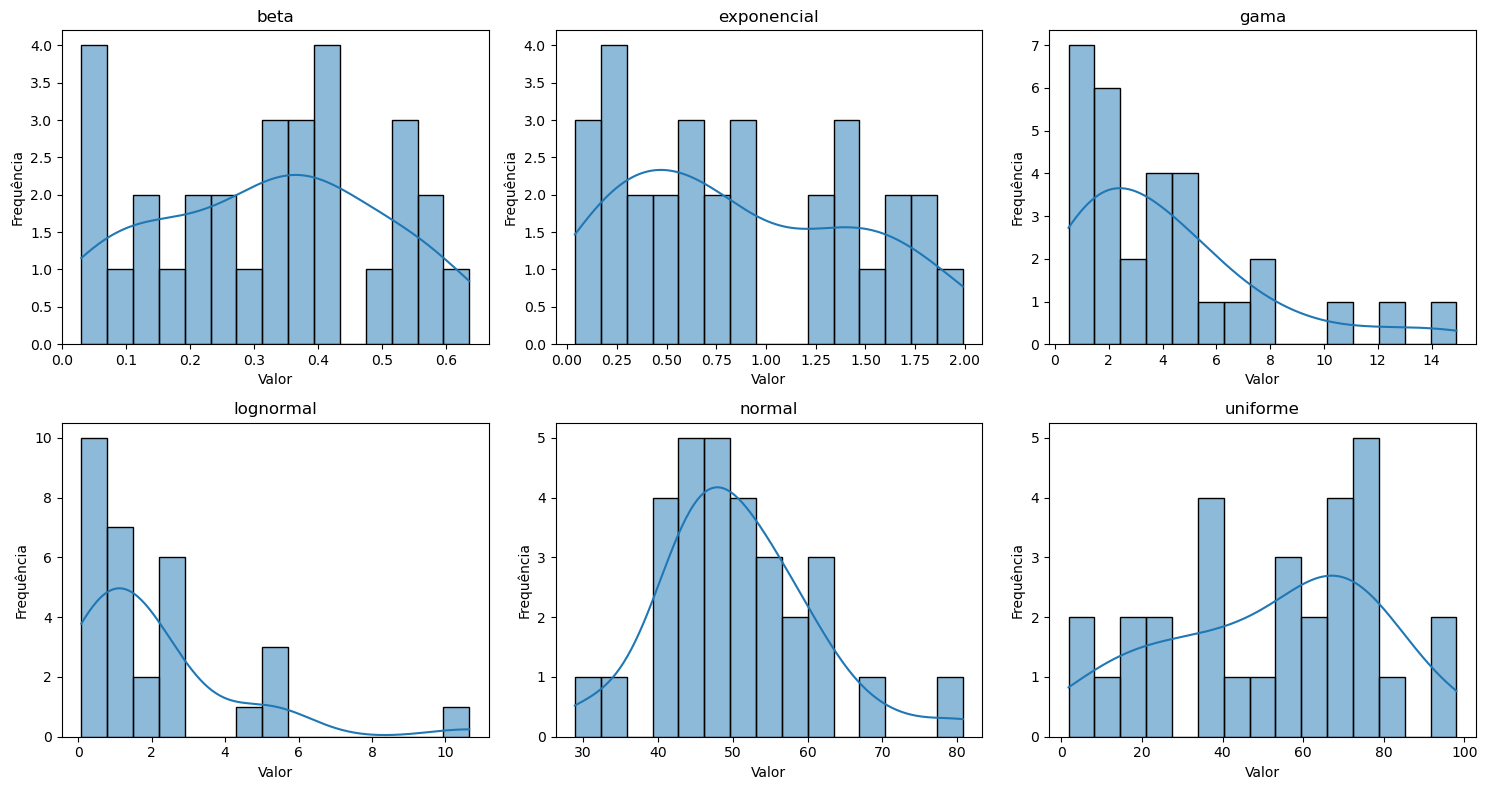

In [573]:
# Plotagem para demonstração
grafs = amostras_sw.groupby('tipo').first().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  

for ax, (idx, row) in zip(axes, grafs.iterrows()):
    sns.histplot(row['valores'], kde=True, bins=15, ax=ax)
    ax.set_title(f'{row["tipo"]}')
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frequência")

# Ajustar layout para não sobrepor títulos
plt.tight_layout()
plt.show()

## Teste de Homogeniedade de Variância

### Teste X² de Bartlett 

In [469]:
def bartlett_manual(data, alpha):
    k = len(data) #quantidade de amostras
    n = [len(i) for i in data] #tamanho de cada amostra
    N = sum(n) #total de observações

    si = [np.var(a, ddof=1) for a in data] #variancia de cada amostra

    sp = 0
    si2 = 0
    fc = 0
    for i in range(k):
        sp = sp + (n[i]-1)*si[i]
        si2 = si2 + (n[i]-1)*np.log(si[i])
        fc = fc + ((1/(n[i]-1))-(1/(N-k)))
        

    sp = sp/(N-k) #Sp²
    q = (N-k)*np.log(sp)-si2 #Q

    #fator de correção
    c = 1+(1/(3*(k-1)))*fc

    bcalc = q/c
    p = 1 - stats.chi2.cdf(bcalc, k-1) #p-valor
    valor_cri = stats.chi2.ppf(1-alpha, k-1) #valor critico

    return bcalc, p, valor_cri

def decisao_btt_manual(b_calc, val_critico):
    return b_calc > val_critico

In [468]:
def bart_scipy(data):
    b_sc, p_sc = stats.bartlett(*data)
    return b_sc, p_sc

def decisao_btt_scipy(p_value, alpha):
    return p_value <= alpha

In [743]:
def criar_amostras_bartlett(qt_grupos, qt_amostra_grupo, tam, var='iguais'):
    grupos = []

    for i in range(qt_grupos):
        grupo = []
        if(var=='iguais'):
            media = 0
            dp = 1
            for _ in range(qt_amostra_grupo):
                amostra = np.random.normal(media, dp, tam)
                grupo.append(amostra)

        elif(var=='diferentes'):
            if(i < 5):
                media = [random.randint(30, 50) for _ in range(10)]
                dp = [random.randint(1, 20) for _ in range(10)]
                for s in range(len(dp)):
                    amostra = np.random.normal(media[s], dp[s], tam)
                    grupo.append(amostra)

            else:
                media = 0
                dp = 1
                for _ in range(qt_amostra_grupo):
                    amostra = np.random.normal(media, dp, tam)
                    grupo.append(amostra)

        grupos.append(grupo)
                
    return grupos

In [699]:
def comparacao_btt(amostras, alpha):
    resultado = []

    for i in range(len(amostras)):
        b_calc_manual, p_value_manual, valor_critico = bartlett_manual(amostras[i], alpha)
        b_calc_scipy, p_value_scipy = bart_scipy(amostras[i])
        var = np.var(amostras[i])

        resultado.append({
            'id_grupo': f"grupo_{i+1}",
            'variancia': var,
            'b_calc_manual': b_calc_manual,
            'b_calc_scipy': b_calc_scipy,
            'valor_critico': valor_critico,
            'valor_p_manual': p_value_manual,
            'valor_p_scipy': p_value_scipy,
            'rejeita_h0_manual': decisao_btt_manual(b_calc_manual, valor_critico),
            'rejeita_h0_scipy': decisao_btt_scipy(p_value_scipy, alpha)
        })

    return pd.DataFrame(resultado)

### Exemplo do Material

In [532]:
loja1 = [620, 630, 610, 650, 585, 590, 630,
        644, 595, 603, 570, 605, 622, 578]

loja2 = [710, 780, 810, 755, 699, 680, 710,
        850, 844, 730, 645, 688, 718, 702]

loja3 = [924, 695, 854, 802, 931, 924, 847,
        800, 769, 863, 901, 888, 757, 712]

lojas = [loja1, loja2, loja3]
alfha = 0.05

In [533]:
bcalc_m, p_m, valor_crit_m = bartlett_manual(lojas, alfha)
bcalc_scip, p_scip = bart_scipy(lojas)

In [534]:
print("--------------Bcalc------------")
print(f"Manual = {bcalc_m}, Scipy = {bcalc_scip}")
print("\n")

decisao_m = decisao_btt_manual(bcalc_m, valor_crit_m)
decisao_s = decisao_btt_scipy(p_scip, alfha)

print("-----------------Decisao-------------")
print(f"Rejeita H0? Manual = {decisao_m}, Scipy = {decisao_s}")

--------------Bcalc------------
Manual = 14.562924928569693, Scipy = 15.45915238705086


-----------------Decisao-------------
Rejeita H0? Manual = True, Scipy = True


In [537]:
var_l1 = np.var(loja1)
var_l2 = np.var(loja2)
var_l3 = np.var(loja3)

print(f"Variâncias:\nloja1 = {var_l1},\nloja2 = {var_l2},\nloja3 = {var_l3}")

Variâncias:
loja1 = 553.1020408163265,
loja2 = 3597.8826530612246,
loja3 = 5782.658163265306


Text(0, 0.5, 'Variância')

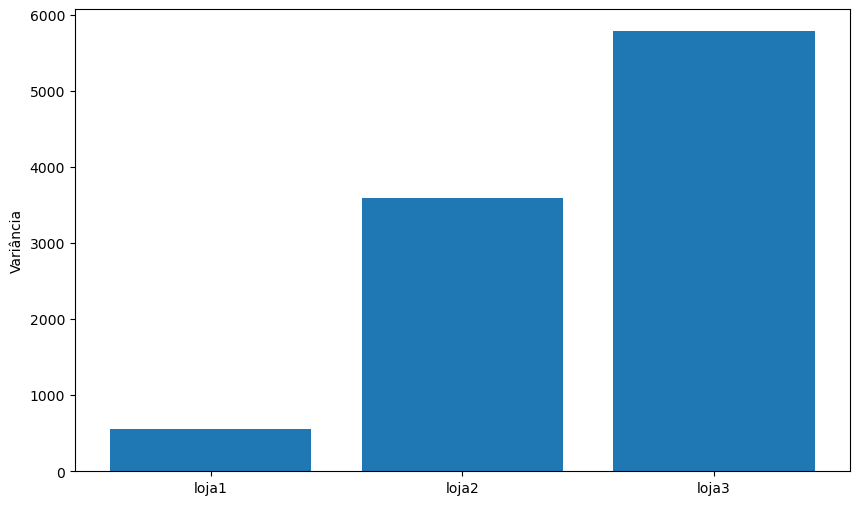

In [607]:
ll = {
    'loja1': var_l1, 'loja2': var_l2, 'loja3': var_l3
}

plt.figure(figsize=(10, 6))
plt.bar(ll.keys(), ll.values())
plt.ylabel("Variância")

### Exemplos - amostras normais de variâncias iguais

In [703]:
mcqueen = 100 #quantidade de grupos
gold = 10 #quantidade de amostras por grupo
ship = 50 #tamanho das amostras

grupos_bartlett = criar_amostras_bartlett(mcqueen, gold, ship, 'iguais')

In [704]:
alpa = 0.05
amostras_btt = comparacao_btt(grupos_bartlett, alpa) 

In [705]:
amostras_btt

,id_grupo,variancia,b_calc_manual,b_calc_scipy,valor_critico,valor_p_manual,valor_p_scipy,rejeita_h0_manual,rejeita_h0_scipy
0,grupo_1,1.011079,10.142410,10.135562,16.918978,0.339080,0.339623,False,False
1,grupo_2,0.974815,2.818503,2.816600,16.918978,0.971058,0.971124,False,False
2,grupo_3,0.980217,5.144409,5.140935,16.918978,0.821542,0.821854,False,False
3,grupo_4,1.110480,11.210677,11.203108,16.918978,0.261544,0.262044,False,False
4,grupo_5,1.021451,12.751593,12.742983,16.918978,0.174172,0.174585,False,False
...,...,...,...,...,...,...,...,...,...
95,grupo_96,1.051316,7.181422,7.176573,16.918978,0.618237,0.618741,False,False
96,grupo_97,1.069340,5.361425,5.357804,16.918978,0.801733,0.802069,False,False
97,grupo_98,0.937766,3.130747,3.128633,16.918978,0.958885,0.958976,False,False
98,grupo_99,0.957962,9.185207,9.179005,16.918978,0.420357,0.420917,False,False


In [706]:
amostras_btt['rejeita_h0_manual'].value_counts()

rejeita_h0_manual
False    95
True      5
Name: count, dtype: int64

In [707]:
amostras_btt['rejeita_h0_scipy'].value_counts()

rejeita_h0_scipy
False    95
True      5
Name: count, dtype: int64

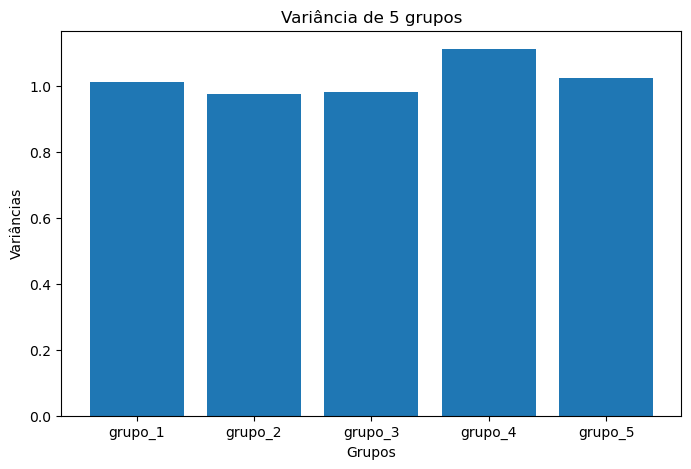

In [708]:
btt50_plot = amostras_btt.iloc[:5]

plt.figure(figsize=(8, 5))
plt.bar(btt50_plot['id_grupo'], btt50_plot['variancia'])
plt.xlabel("Grupos")
plt.ylabel("Variâncias")
plt.title("Variância de 5 grupos")
plt.show()

#### Para amostras com tamanho 1000

In [737]:
sunday = 1000

gp_btt = criar_amostras_bartlett(mcqueen, gold, marvelous, 'iguais')

In [738]:
btt1000 = comparacao_btt(gp_btt, alpa)
btt1000

,id_grupo,variancia,b_calc_manual,b_calc_scipy,valor_critico,valor_p_manual,valor_p_scipy,rejeita_h0_manual,rejeita_h0_scipy
0,grupo_1,1.030491,8.545814,8.545529,16.918978,0.480209,0.480237,False,False
1,grupo_2,1.003655,11.095137,11.094767,16.918978,0.269244,0.269269,False,False
2,grupo_3,1.004735,18.795845,18.795218,16.918978,0.026986,0.026992,True,True
3,grupo_4,1.001162,9.473395,9.473079,16.918978,0.394771,0.394798,False,False
4,grupo_5,0.992529,10.024830,10.024495,16.918978,0.348479,0.348506,False,False
...,...,...,...,...,...,...,...,...,...
95,grupo_96,1.000903,5.660705,5.660516,16.918978,0.773337,0.773355,False,False
96,grupo_97,0.998495,7.124468,7.124230,16.918978,0.624162,0.624187,False,False
97,grupo_98,1.009176,4.583425,4.583272,16.918978,0.869007,0.869019,False,False
98,grupo_99,0.990163,8.155499,8.155227,16.918978,0.518555,0.518582,False,False


In [739]:
btt1000['rejeita_h0_manual'].value_counts()

rejeita_h0_manual
False    92
True      8
Name: count, dtype: int64

In [740]:
btt500['rejeita_h0_scipy'].value_counts()

rejeita_h0_scipy
False    98
True      2
Name: count, dtype: int64

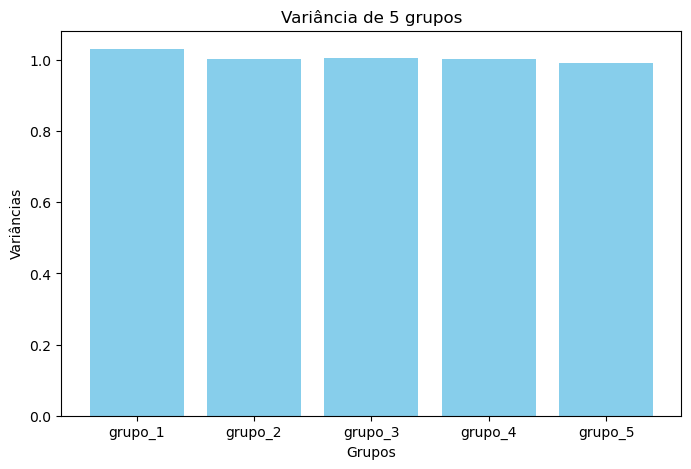

In [741]:
btt1000_plot = btt1000.iloc[:5]

plt.figure(figsize=(8, 5))
plt.bar(btt1000_plot['id_grupo'], btt1000_plot['variancia'], color='skyblue')
plt.xlabel("Grupos")
plt.ylabel("Variâncias")
plt.title("Variância de 5 grupos")
plt.show()

#### Amostras aleatórias com variâncias diferentes

In [744]:
bakushin = 100 #Qtd grupos
opera = 10 #qtd de amostra por grupo
amazon = 50 #tamanho das amostras
alf = 0.05

batt = criar_amostras_bartlett(bakushin, opera, amazon, 'diferentes')

In [745]:
battz = comparacao_btt(kk, alf)
battz

,id_grupo,variancia,b_calc_manual,b_calc_scipy,valor_critico,valor_p_manual,valor_p_scipy,rejeita_h0_manual,rejeita_h0_scipy
0,grupo_1,0.996017,9.292056,9.285782,16.918978,0.410763,0.411323,False,False
1,grupo_2,1.008394,6.792605,6.788019,16.918978,0.658702,0.659179,False,False
2,grupo_3,1.029920,10.784100,10.776819,16.918978,0.290799,0.291318,False,False
3,grupo_4,1.135179,5.004587,5.001208,16.918978,0.833908,0.834203,False,False
4,grupo_5,0.996229,6.835296,6.830681,16.918978,0.654263,0.654743,False,False
...,...,...,...,...,...,...,...,...,...
95,grupo_96,1.013475,9.174788,9.168593,16.918978,0.421299,0.421859,False,False
96,grupo_97,0.998372,3.663316,3.660843,16.918978,0.932144,0.932285,False,False
97,grupo_98,0.987487,7.994762,7.989364,16.918978,0.534674,0.535218,False,False
98,grupo_99,0.926346,6.534655,6.530242,16.918978,0.685442,0.685898,False,False


In [746]:
battz['rejeita_h0_manual'].value_counts()

rejeita_h0_manual
False    99
True      1
Name: count, dtype: int64

In [747]:
battz['rejeita_h0_scipy'].value_counts()

rejeita_h0_scipy
False    99
True      1
Name: count, dtype: int64

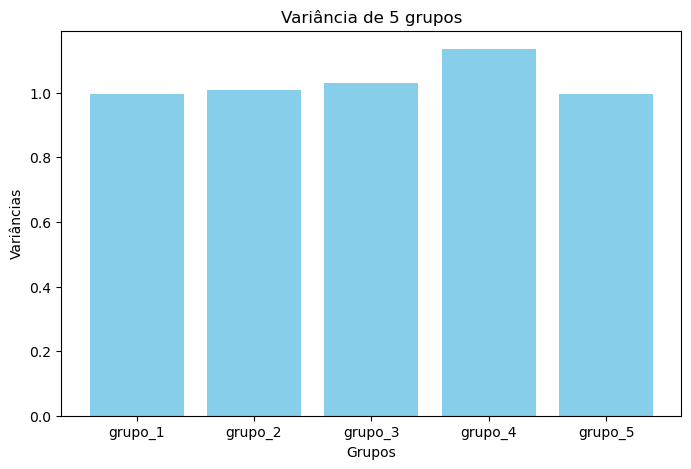

In [820]:
dif50_plot = battz.iloc[:5]

plt.figure(figsize=(8, 5))
plt.bar(dif50_plot['id_grupo'], dif50_plot['variancia'], color='skyblue')
plt.xlabel("Grupos")
plt.ylabel("Variâncias")
plt.title("Variância de 5 grupos")
plt.show()

#### Para amostras com tamanho 1000

In [816]:
cj = 1000
al = 0.05

mm = criar_amostras_bartlett(bakushin, opera, cj, 'diferentes')

In [817]:
jj = comparacao_btt(mm, al)
jj

,id_grupo,variancia,b_calc_manual,b_calc_scipy,valor_critico,valor_p_manual,valor_p_scipy,rejeita_h0_manual,rejeita_h0_scipy
0,grupo_1,157.514682,8873.994288,8873.698301,16.918978,0.000000,0.000000,True,True
1,grupo_2,242.315376,8913.203214,8912.905919,16.918978,0.000000,0.000000,True,True
2,grupo_3,240.603766,5073.373436,5073.204216,16.918978,0.000000,0.000000,True,True
3,grupo_4,140.137669,5244.727738,5244.552803,16.918978,0.000000,0.000000,True,True
4,grupo_5,163.382565,4228.274885,4228.133853,16.918978,0.000000,0.000000,True,True
...,...,...,...,...,...,...,...,...,...
95,grupo_96,0.992618,4.585508,4.585356,16.918978,0.868842,0.868854,False,False
96,grupo_97,0.994299,5.916002,5.915805,16.918978,0.748295,0.748314,False,False
97,grupo_98,0.986924,11.389132,11.388752,16.918978,0.249976,0.250000,False,False
98,grupo_99,0.998591,13.149228,13.148789,16.918978,0.155969,0.155988,False,False


In [818]:
jj['rejeita_h0_manual'].value_counts()

rejeita_h0_manual
False    91
True      9
Name: count, dtype: int64

In [819]:
jj['rejeita_h0_scipy'].value_counts()

rejeita_h0_scipy
False    91
True      9
Name: count, dtype: int64

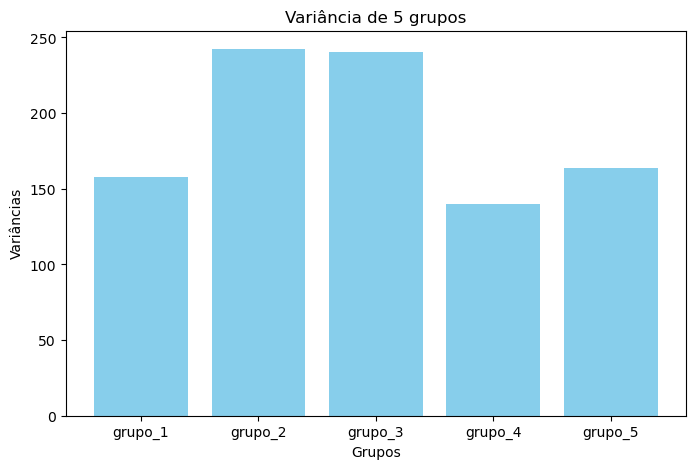

In [823]:
dif1000_plot = jj.iloc[:5]

plt.figure(figsize=(8, 5))
plt.bar(dif1000_plot['id_grupo'], dif1000_plot['variancia'], color='skyblue')
plt.xlabel("Grupos")
plt.ylabel("Variâncias")
plt.title("Variância de 5 grupos")
plt.show()